In [2]:
# Importancion de librerias
import pandas as pd                 # Manejo de estructuras tipo Dataframe
import numpy as np                  # Operaciones matematicas
from scipy import stats             # Funciones estadísticas y analisis de datos
import seaborn as sns               # Visualizacion de datos
import matplotlib.pyplot as plt     # Creación y visualizacion de graficos en 2D

In [3]:
# Parametros
n = 1000  # numero de observaciones
Con_Tasa_A1 = 0.10  # tasa de conversion para variante A en prueba 1
Con_Tasa_B1 = 0.15  # tasa de conversion para variante B en prueba 1
Con_Tasa_A2 = 0.12  # tasa de conversion para variante A en prueba 2
Con_Tasa_B2 = 0.18  # tasa de conversion para variante B en prueba 2

# Generacion de datos
np.random.seed(42)
Dic1 = {'Variante': ['A']*n + ['B']*n,
                'Conversion': np.concatenate([np.random.binomial(1, Con_Tasa_A1, n),
                                  np.random.binomial(1, Con_Tasa_B1, n)])}

Dic2 = {'Variante': ['A']*n + ['B']*n,
                'Conversion': np.concatenate([np.random.binomial(1, Con_Tasa_A2, n),
                                              np.random.binomial(1, Con_Tasa_B2, n)])}

df1 = pd.DataFrame(Dic1)
df2 = pd.DataFrame(Dic2)

In [4]:
df1.head(5)

,Variante,Conversion
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


In [5]:
df2.head(5)

,Variante,Conversion
0,A,0
1,A,0
2,A,1
3,A,0
4,A,0


In [6]:
# Analisis de Prueba 1
Conv_A1 = df1[df1['Variante'] == 'A']['Conversion']
Conv_B1 = df1[df1['Variante'] == 'B']['Conversion']

# Analisis de Prueba 2
Conv_A2 = df2[df2['Variante'] == 'A']['Conversion']
Conv_B2 = df2[df2['Variante'] == 'B']['Conversion']

print('Análisis de Prueba 1')
print(f'El valor mediana para el grupo A1 es de: {Conv_A1.median()*100}')
print(f'El valor mediana para el grupo B1 es de: {Conv_B1.median()*100}')

print('Análisis de Prueba 2')
print(f'El valor mediana para el grupo A2 es de: {Conv_A2.median()*100}')
print(f'El valor mediana para el grupo B2 es de: {Conv_B2.median()*100}')

Análisis de Prueba 1
El valor mediana para el grupo A1 es de: 0.0
El valor mediana para el grupo B1 es de: 0.0
Análisis de Prueba 2
El valor mediana para el grupo A2 es de: 0.0
El valor mediana para el grupo B2 es de: 0.0


In [7]:
# Prueba T-student
tstat1, pval1 = stats.ttest_ind(Conv_A1, Conv_B1)
tstat2, pval2 = stats.ttest_ind(Conv_A2, Conv_B2)

print('Prueba T-student caso 1')
print(f'Estadístico t: {tstat1}')
print(f'Valor p: {pval1}')

print('Prueba T-student caso 2')
print(f'Estadístico t: {tstat2}')
print(f'Valor p: {pval2}')

Prueba T-student caso 1
Estadístico t: -3.512911226002963
Valor p: 0.0004530761711250111
Prueba T-student caso 2
Estadístico t: -3.2318377743100495
Valor p: 0.0012499829228930738


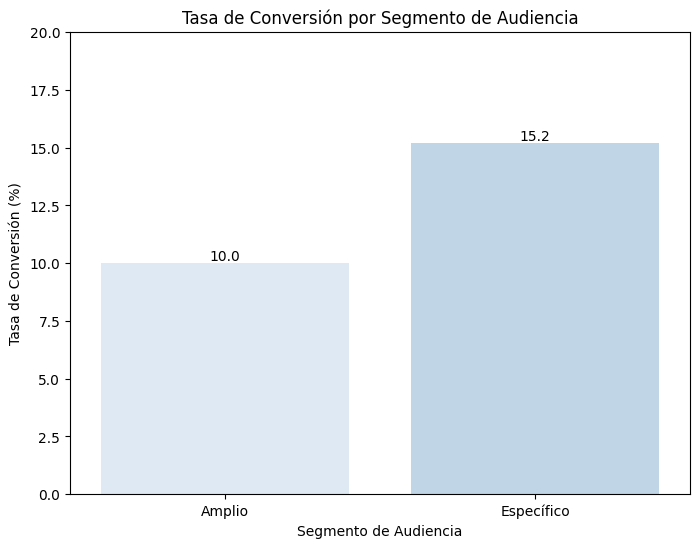

In [8]:
# Datos de conversion simulados para segmentos de audiencia
segmentos = ['Amplio', 'Específico']
conv_seg = [10.0, 15.2]
sns.set_palette("Blues")

# Creacion de la grafica
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = segmentos, y = conv_seg)

# Agregar etiquetas con los valores de la tasa de conversion
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('Segmento de Audiencia')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión por Segmento de Audiencia')
plt.ylim(0, 20)
plt.show()


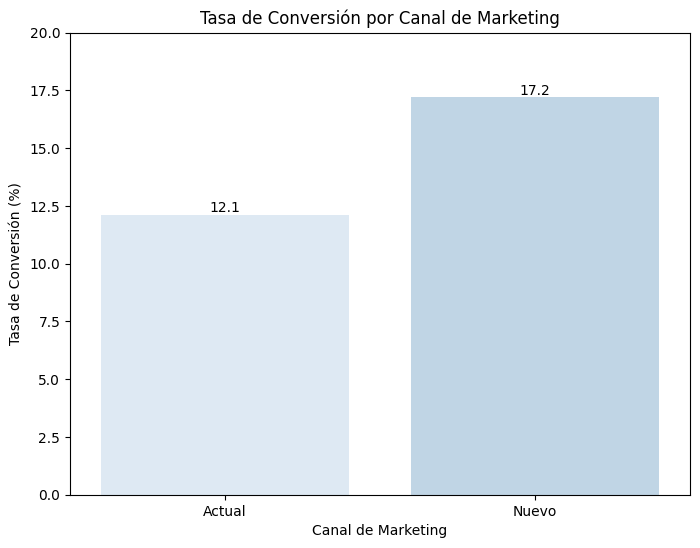

In [9]:
canales = ['Actual', 'Nuevo']
conv_can = [12.1, 17.2]

# Crear la grafica
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = canales, y = conv_can)

# Agregar etiquetas con los valores de la tasa de conversion
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('Canal de Marketing')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión por Canal de Marketing')
plt.ylim(0, 20)
plt.show()